<a href="https://colab.research.google.com/github/bigbrowniebael/Python-Data-Analysis-Portfolio/blob/main/Movie_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this project is to find out the highest earning genre for films and to showcase my ability to clean data

In [1]:
from google.colab import files
uploaded = files.upload()

import numpy as np
import pandas as pd

df = pd.read_csv('tmdb_5000_movies.csv')
df.head()

Saving tmdb_5000_movies.csv to tmdb_5000_movies (7).csv


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
df.info()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

0

In [7]:
# Remove irrelevant columns
df = df.drop(['homepage', 'status', 'tagline','id', 'production_countries', 'production_companies','keywords', 'overview', 'original_language'], axis=1)

# Remove rows with missing 'budget' or 'revenue'
df = df.dropna(subset=['budget', 'revenue'])

# Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Make float values more digestible
pd.options.display.float_format = '{:,.0f}'.format


# Calculate profit and create a profit column
df['profit'] = df['revenue'] - df['budget']
df['profit_pretty'] = df['profit'].apply(lambda x: f"{x:,.0f}")

In [5]:
df.info()
df.isnull().sum()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10865 non-null  float64       
 1   budget          10865 non-null  int64         
 2   revenue         10865 non-null  int64         
 3   original_title  10865 non-null  object        
 4   director        10821 non-null  object        
 5   runtime         10865 non-null  int64         
 6   genres          10842 non-null  object        
 7   release_date    10865 non-null  datetime64[ns]
 8   vote_count      10865 non-null  int64         
 9   vote_average    10865 non-null  float64       
 10  release_year    10865 non-null  int64         
 11  budget_adj      10865 non-null  float64       
 12  revenue_adj     10865 non-null  float64       
 13  profit          10865 non-null  int64         
 14  profit_pretty   10865 non-null  object        
dtypes: date

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_pretty
0,33,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6,2015,"137,999,939","1,392,445,893",1363528810,"1,363,528,810"
1,28,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7,2015,"137,999,939","348,161,292",228436354,"228,436,354"
2,13,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6,2015,"101,199,956","271,619,025",185238201,"185,238,201"
3,11,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,8,2015,"183,999,919","1,902,723,130",1868178225,"1,868,178,225"
4,9,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7,2015,"174,799,923","1,385,748,801",1316249360,"1,316,249,360"
5,9,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,2015-12-25,3929,7,2015,"124,199,945","490,314,247",397950503,"397,950,503"
6,9,155000000,440603537,Terminator Genisys,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,2015-06-23,2598,6,2015,"142,599,937","405,355,076",285603537,"285,603,537"
7,8,108000000,595380321,The Martian,Ridley Scott,141,Drama|Adventure|Science Fiction,2015-09-30,4572,8,2015,"99,359,956","547,749,654",487380321,"487,380,321"
8,7,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,2015-06-17,2893,6,2015,"68,079,970","1,064,192,017",1082730962,"1,082,730,962"
9,6,175000000,853708609,Inside Out,Pete Docter,94,Comedy|Animation|Family,2015-06-09,3935,8,2015,"160,999,929","785,411,575",678708609,"678,708,609"


In [2]:
# The goal now, is to show the most popular genres by revenue as revenue is indicative of how many people spent money for the movie

import ast

# Currently, the genre column values are very hectic, and need diffrentiation
# Convert the 'genres' column from string representation of a list of dictionaries to an actual list of dictionaries
df['genres'] = df['genres'].apply(ast.literal_eval)

# Now, extract the 'name' from each dictionary in the list
df['genres'] = df['genres'].apply(lambda x: [genre['name'] for genre in x])

# Explode the list of genres into separate rows
df_exploded = df.explode('genres')

# Clean up extra spaces, just in case
df_exploded['genres'] = df_exploded['genres'].str.strip()

# Display the exploded DataFrame to see the results
print(df_exploded.head())

      budget           genres                                      homepage  \
0  237000000           Action                   http://www.avatarmovie.com/   
0  237000000        Adventure                   http://www.avatarmovie.com/   
0  237000000          Fantasy                   http://www.avatarmovie.com/   
0  237000000  Science Fiction                   http://www.avatarmovie.com/   
1  300000000        Adventure  http://disney.go.com/disneypictures/pirates/   

      id                                           keywords original_language  \
0  19995  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
0  19995  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
0  19995  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
0  19995  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1    285  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                             original_

In [5]:
# Group by genre and sum the revenue
genre_revenue = df_exploded.groupby('genres')['revenue'].sum().reset_index()

# Sort by revenue to get the most profitable genres
genre_revenue = genre_revenue.sort_values(by='revenue', ascending=False)

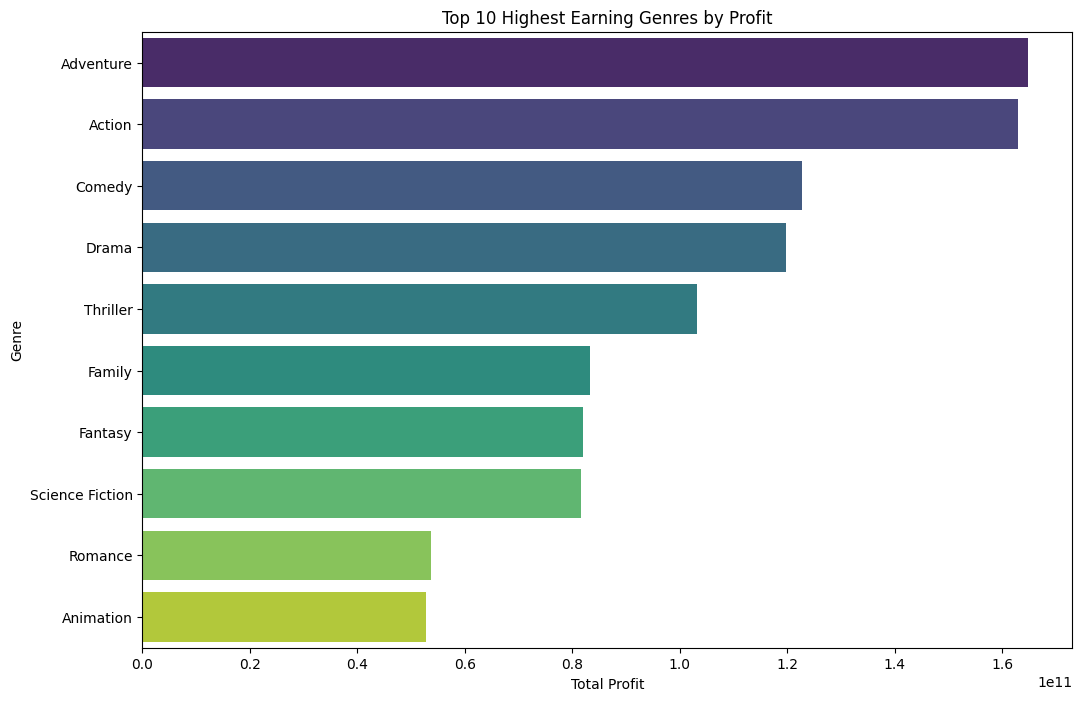

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 10 highest-earning genres
top_10_genres = genre_revenue.head(10)

# Plot the top 10 genres by profit
plt.figure(figsize=(12, 8))
sns.barplot(x='revenue', y='genres', data=top_10_genres, palette='viridis', hue='genres')

# Add titles and labels
plt.title('Top 10 Highest Earning Genres by Profit')
plt.xlabel('Total Profit')
plt.ylabel('Genre')
plt.show()

My conclusion is movie producers are messing up big time by not doing adventure movies anymore. With the recent worldwide phenomenon of production companies constantly trying to use nostalgia as a means to make more product, you would think they would have the brains to bring back adventure movies like The Mummy, Journey to the Center of the Earth, Pirates of the Carribean. Adventure movies make up for the 4 quadrants of moviegoers, and even families, the most profitable quadrant.